In [31]:
# calculating the spike triggered average is an example of a feature to use

def compute_sta(stim, rho, num_timesteps):
    """Compute the spike-triggered average from a stimulus and spike-train.
    
    Args:
        stim: stimulus time-series
        rho: spike-train time-series
        num_timesteps: how many timesteps to use in STA
        
    Returns:
        spike-triggered average for num_timesteps timesteps before spike"""
    
    # rho is the vector showing if there was a spike (1) or not (0)
    
    sta = np.zeros((num_timesteps,)) # check what happens without the comma

    # This command finds the indices of all of the spikes that occur
    # after 300 ms into the recording.
    spike_times = rho[num_timesteps:].nonzero()[0] + num_timesteps # this is array of spike times, need to understand this more

    # Fill in this value. Note that you should not count spikes that occur
    # before 300 ms into the recording.

    num_spikes = len(spike_times) # outputs the number of spikes
    print(num_spikes)
    

    # Compute the spike-triggered average of the spikes found.
    # To do this, compute the average of all of the vectors
    # starting 300 ms (exclusive) before a spike and ending at the time of
    # the event (inclusive). Each of these vectors defines a list of
    # samples that is contained within a window of 300 ms before each
    # spike. The average of these vectors should be completed in an
    # element-wise manner.
    # 
    # Your code goes here:
    
    for i in spike_times:
        sta = sta + stim[i-num_timesteps:i]
    
    sta = sta/num_spikes
    
    return sta

53583


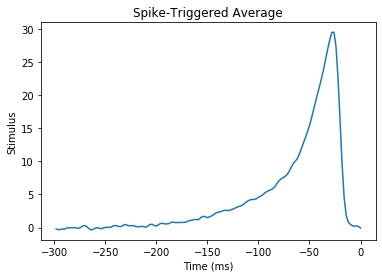

In [35]:
"""
Created on Wed Apr 22 15:15:16 2015

Quiz 2 code.
"""

from __future__ import division
import numpy as np
import matplotlib.pyplot as plt

# importing package to opening pickle file
import pickle

FILENAME = 'c1p8.pickle'

# opening pickle file
with open(FILENAME, 'rb') as f:
    data = pickle.load(f)

stim = data['stim']
rho = data['rho']


# Fill in these values
time_window = 300
sampling_period = 1000*(1/500) # in ms - the sampling rate was 500 Hz
num_timesteps = int(time_window/sampling_period) # if response window to check is 300 ms, and the sampling period is 2 ms, then number of steps in the window is 150

sta = compute_sta(stim, rho, num_timesteps) # spike triggered average vector

time = (np.arange(-num_timesteps, 0) + 1) * sampling_period # time plot

plt.plot(time, sta)
plt.xlabel('Time (ms)')
plt.ylabel('Stimulus')
plt.title('Spike-Triggered Average')

plt.show()


In [36]:
# this checks if there are spikes in the data set
c = 0
for i in range(len(data['rho'])):
    if data['rho'][i] == 1:
        c = c+1

print(c) # the number of spikes
print(len(data['rho'])) # number of total recordings


53601
600000
